# Import Libraries & Data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path= r'C:\Users\k_pat\OneDrive\Desktop\Instacart Basket Analysis'

In [6]:
# Import full data pkl
df = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'full_instacart_data.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.shape

(32404859, 33)

# 2. Analysis

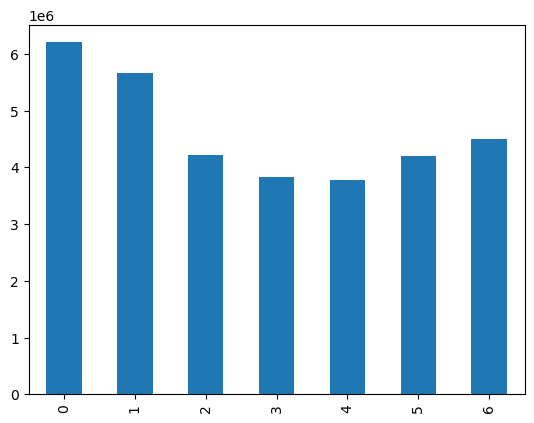

In [7]:
# Create a bar chart sorted on index (0-6)
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

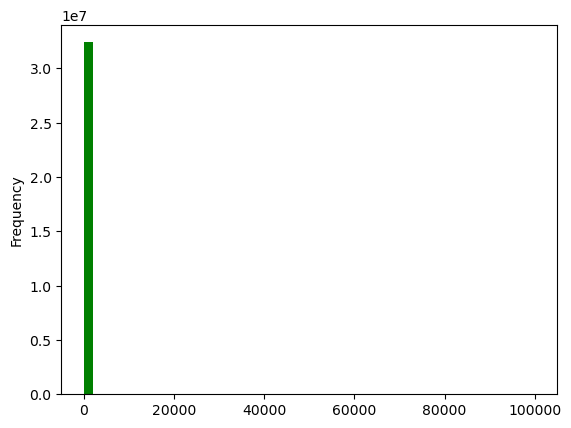

In [8]:
# Creating histogram to show frequency of prices
hist = df['prices'].plot.hist(bins = 50, color = 'green')

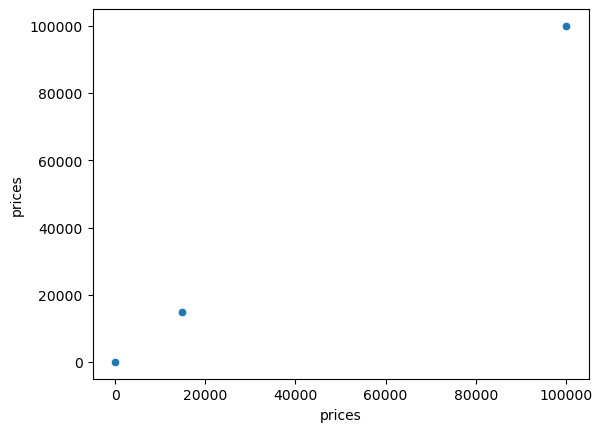

In [9]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [10]:
# line chart using subset
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
# dev is the boolean list of true/false
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in data frame big
big = df[dev]

In [13]:
# Store 30% of the sample in data frame small
small = df[~dev]

In [14]:
# Checking length is correct
len(big)+len(small)

32404859

In [15]:
# Creating new data frame with just the columns needed for the line chart
df_small = small[['orders_day_of_week','prices']]

In [16]:
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


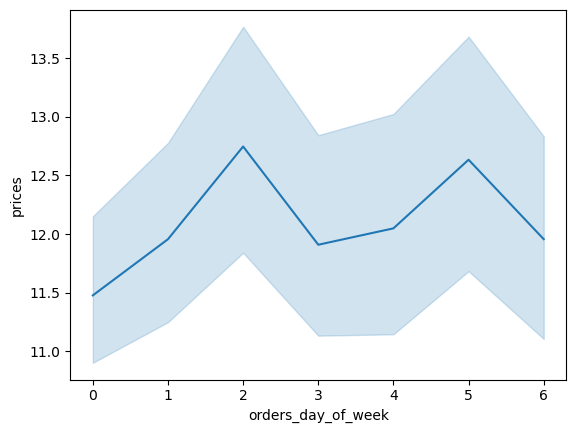

In [17]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

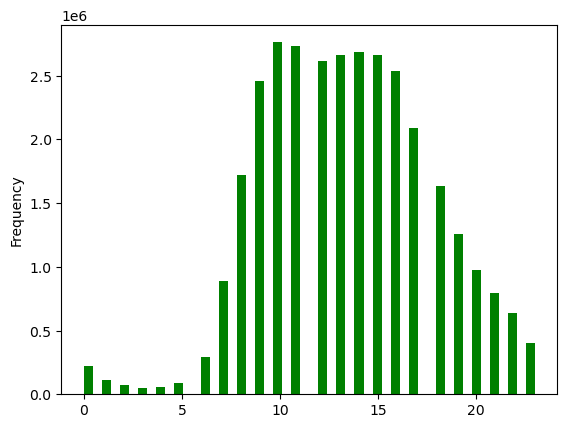

In [20]:
# Create a histogram of the “order_hour_of_day” column

hist2 = df['order_hour_of_day'].plot.hist(bins = 50, color = 'green')

Most orders are placed at 10-11am and are steady in the afternoon, starting to drop off at 5pm. There are few orders placed between midnight and 7am.

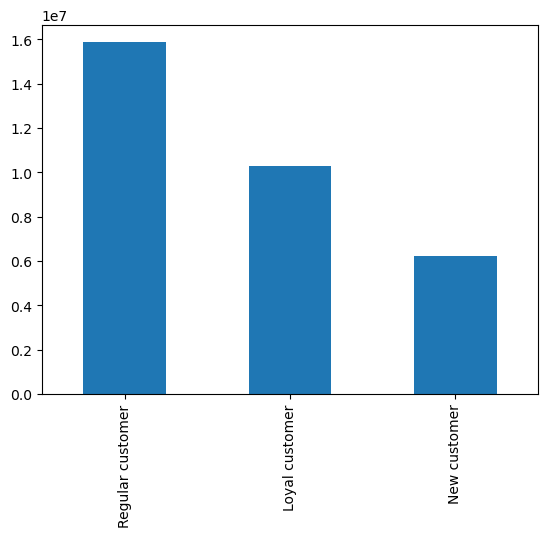

In [21]:
# Create a bar chart from the “loyalty_flag” column.
bar = df['loyalty_flag'].value_counts().plot.bar()

Our largest customer base are classed as regular customers, meaning they have placed between 10 and 40 orders.

In [22]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
# Creating new data frame with just the columns needed for the line chart
df_small_2 = small[['order_hour_of_day','prices']]

In [24]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


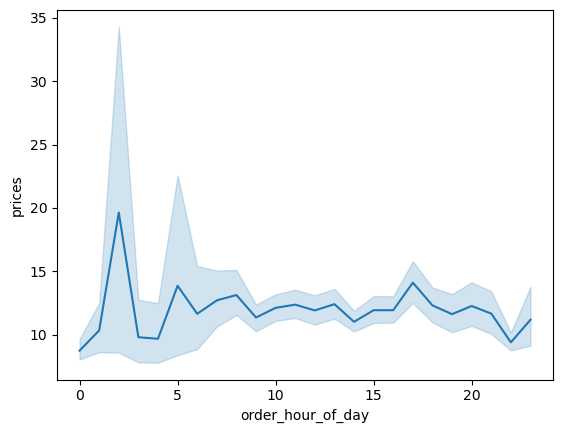

In [25]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

Customers seem to spend more in the early morning. Which is where we don't see many orders coming through. Indicating these are higher value orders than customers place during the day.
We are seeing a high frequency of orders with a low expenditure during the day (particularly 10-11am) and a low frequency of orders with a high expenditure between 12-7am.

In [26]:
# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [27]:
# Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['age','no_of_dependants']]


In [28]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


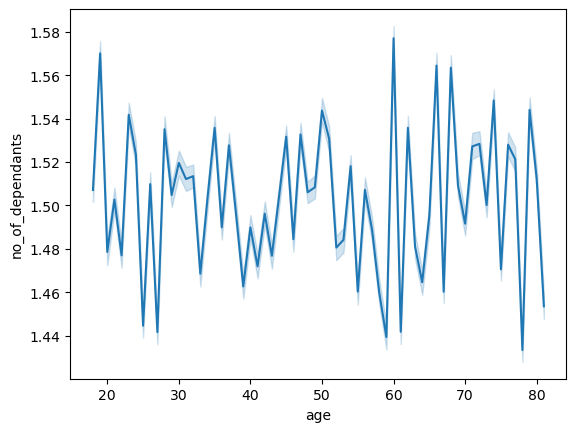

In [29]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

In [30]:
df_small_3['no_of_dependants'].describe()

count    9.721098e+06
mean     1.502105e+00
std      1.118703e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

There is no clear trend or connection between age and number of dependents for Instacart customers.

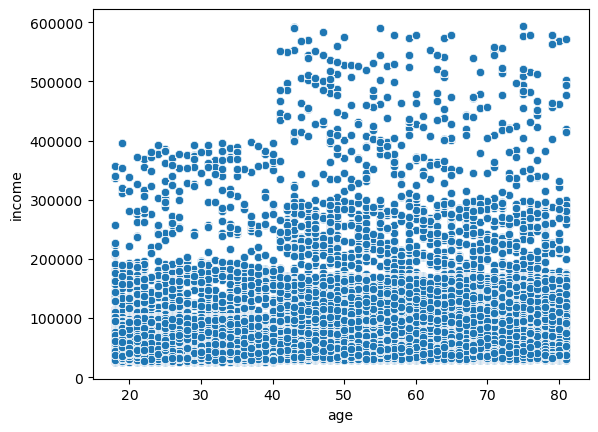

In [7]:
# You’ll also need to explore whether there’s a connection between age and spending power (income).

scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df)

# 3. Export

In [33]:
# Exporting charts to folder as image
bar.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'bar_orders_dow.png'))

In [34]:
hist.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'hist_exp.png'))

In [35]:
hist2.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'exp_hour_of_day.png'))

In [36]:
scatter1.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'scatter_prices.png'))

In [37]:
line.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'line_dow_prices.png'))

In [38]:
bar.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'bar_loyalty_flag.png'))

In [39]:
line_2.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'line_hour_prices.png'))

In [40]:
line_3.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'line_age_no_of_dependants.png'))

In [8]:
scatter_2.figure.savefig(os.path.join(path, '4. Analysis','Visualisations', 'age_income.png'))